<a href="https://colab.research.google.com/github/AndrejHorvat1/Multibeam-Forward-Looking-Sonar/blob/main/UATD_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#povezivanje s driveom
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
drive_image_dir_train = "/content/drive/MyDrive/UATD_YOLO_Dataset_v2/images/train"
drive_label_dir_train = "/content/drive/MyDrive/UATD_YOLO_Dataset_v2/labels/train"
drive_image_dir_val = "/content/drive/MyDrive/UATD_YOLO_Dataset_v2/images/val"
drive_label_dir_val = "/content/drive/MyDrive/UATD_YOLO_Dataset_v2/labels/val"

In [3]:
import os
import shutil
from glob import glob

def prepare_base_dataset(drive_image_dir_train, drive_label_dir_train,
                          drive_image_dir_val, drive_label_dir_val,
                          colab_base_path="/content/UATD_YOLO_BASE"):

    os.makedirs(f"{colab_base_path}/images/train", exist_ok=True)
    os.makedirs(f"{colab_base_path}/labels/train", exist_ok=True)
    os.makedirs(f"{colab_base_path}/images/val", exist_ok=True)
    os.makedirs(f"{colab_base_path}/labels/val", exist_ok=True)

    def copy_original_files(src_dir, dst_dir):
        for file_path in glob(os.path.join(src_dir, "*")):
            filename = os.path.basename(file_path)
            if "_aug" not in filename:
                shutil.copy(file_path, dst_dir)

    copy_original_files(drive_image_dir_train, f"{colab_base_path}/images/train")
    copy_original_files(drive_label_dir_train, f"{colab_base_path}/labels/train")
    copy_original_files(drive_image_dir_val, f"{colab_base_path}/images/val")
    copy_original_files(drive_label_dir_val, f"{colab_base_path}/labels/val")

    print("Podaci kopirani u Colab workspace")

In [4]:
prepare_base_dataset(drive_image_dir_train, drive_label_dir_train,
                     drive_image_dir_val, drive_label_dir_val)

Podaci kopirani u Colab workspace


In [5]:
!cp -r "/content/drive/My Drive/UATD_YOLO_Dataset_Test_v2" /content/

In [6]:
data_yaml = """train: /content/UATD_YOLO_BASE/images/train
val: /content/UATD_YOLO_BASE/images/val
nc: 10
test:
  - /content/UATD_YOLO_Dataset_Test_v2/images/test_set1
  - /content/UATD_YOLO_Dataset_Test_v2/images/test_set2
names: ['cube', 'ball', 'cylinder', 'human body', 'plane', 'circle cage', 'square cage', 'metal bucket', 'tyre', 'rov']
"""

os.makedirs("yolo_dataset", exist_ok=True)

with open("yolo_dataset/data.yaml", "w") as f:
    f.write(data_yaml)

In [7]:
pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 266MB/s]



 Epoha 1/15
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=custom_loop, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

100%|██████████| 755k/755k [00:00<00:00, 27.9MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

 22        [15, 18, 21]  1   2119918  ultralytics.nn.modules.head.Detect           [10, [128, 256, 512]]         
Model summary: 129 layers, 11,139,470 parameters, 11,139,454 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 104MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 77.8±22.5 MB/s, size: 249.5 KB)


train: Scanning /content/UATD_YOLO_BASE/labels/train... 6070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6070/6070 [00:13<00:00, 437.11it/s]


train: New cache created: /content/UATD_YOLO_BASE/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 60.0±19.9 MB/s, size: 311.8 KB)


val: Scanning /content/UATD_YOLO_BASE/labels/val... 1519 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1519/1519 [00:03<00:00, 442.42it/s]

val: New cache created: /content/UATD_YOLO_BASE/labels/val.cache


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.95G      1.978      2.786      1.203         14        640: 100%|██████████| 759/759 [02:52<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:22<00:00,  4.16it/s]


                   all       1519       2477      0.702      0.619       0.67      0.305

1 epochs completed in 0.055 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:18<00:00,  5.05it/s]


                   all       1519       2477      0.707       0.62      0.673      0.306
                  cube        525        526      0.609      0.821      0.758      0.363
                  ball        605        606      0.866      0.764      0.869       0.42
              cylinder        113        113      0.627      0.646      0.624      0.272
            human body        278        279      0.708      0.819      0.828      0.359
                 plane        167        167      0.691      0.469      0.659      0.333
           circle cage        141        142      0.872      0.481      0.627      0.333
           square cage        188        188      0.909      0.457      0.656      0.249
          metal bucket         97         97      0.728      0.515      0.659      0.296
                  tyre        227        229      0.655      0.467      0.521      0.265
                   rov        130        130      0.406      0.762      0.526      0.172
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:03<00:00, 439.82it/s]

val: New cache created: /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:25<00:00,  7.72it/s]


                   all       1596       2323       0.56       0.49      0.535      0.207
                  cube        338        338      0.315       0.82      0.495      0.152
                  ball        390        390      0.796      0.818      0.861      0.415
              cylinder         93         93      0.435      0.452      0.429       0.14
            human body        149        149      0.504      0.752      0.706      0.289
                 plane        269        269      0.678      0.491      0.639      0.304
           circle cage        197        197      0.873       0.21      0.524      0.203
           square cage        335        335      0.617     0.0866      0.337      0.105
          metal bucket         11         11      0.208     0.0909      0.168     0.0464
                  tyre        241        241      0.702      0.419      0.574      0.229
                   rov        300        300      0.469       0.76      0.618      0.184
Speed: 0.5ms preproce

train: Scanning /content/UATD_YOLO_BASE/labels/train.cache... 6070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6070/6070 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1028.3±862.8 MB/s, size: 311.8 KB)


val: Scanning /content/UATD_YOLO_BASE/labels/val.cache... 1519 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1519/1519 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.12G      2.004       2.32       1.22         14        640: 100%|██████████| 759/759 [02:50<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:21<00:00,  4.33it/s]


                   all       1519       2477      0.804       0.71      0.816      0.385

1 epochs completed in 0.055 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:19<00:00,  4.84it/s]


                   all       1519       2477      0.805      0.709      0.817      0.385
                  cube        525        526      0.658      0.901      0.872      0.399
                  ball        605        606      0.892      0.835        0.9      0.431
              cylinder        113        113      0.774      0.513       0.69      0.319
            human body        278        279      0.698      0.878      0.844      0.364
                 plane        167        167      0.872      0.734      0.869      0.436
           circle cage        141        142      0.889      0.521      0.741      0.378
           square cage        188        188      0.906      0.564      0.833      0.379
          metal bucket         97         97      0.761      0.952      0.938      0.449
                  tyre        227        229      0.826      0.603      0.754      0.399
                   rov        130        130       0.77      0.592      0.726      0.297
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:25<00:00,  7.72it/s]


                   all       1596       2323      0.693      0.606      0.695      0.279
                  cube        338        338      0.366      0.822      0.611       0.19
                  ball        390        390      0.794      0.854      0.867      0.435
              cylinder         93         93      0.482      0.301      0.393      0.127
            human body        149        149      0.452      0.859      0.727      0.256
                 plane        269        269      0.858      0.673      0.827      0.437
           circle cage        197        197      0.872      0.276      0.631      0.273
           square cage        335        335      0.662      0.175      0.415      0.122
          metal bucket         11         11      0.728      0.909      0.917      0.302
                  tyre        241        241      0.858      0.602      0.789      0.367
                   rov        300        300      0.859       0.59       0.77      0.284
Speed: 0.4ms preproce

train: Scanning /content/UATD_YOLO_BASE/labels/train.cache... 6070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6070/6070 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 482.1±298.7 MB/s, size: 311.8 KB)


val: Scanning /content/UATD_YOLO_BASE/labels/val.cache... 1519 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1519/1519 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.94G      1.707      1.291      1.107         14        640: 100%|██████████| 759/759 [02:46<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:21<00:00,  4.49it/s]


                   all       1519       2477      0.834      0.783      0.875      0.426

1 epochs completed in 0.053 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:18<00:00,  5.14it/s]


                   all       1519       2477      0.832      0.784      0.873      0.427
                  cube        525        526      0.751      0.899      0.912      0.462
                  ball        605        606      0.878      0.904      0.936       0.47
              cylinder        113        113      0.786      0.779      0.842       0.36
            human body        278        279      0.724      0.921        0.9      0.423
                 plane        167        167      0.945      0.612      0.878       0.49
           circle cage        141        142      0.881      0.628      0.808      0.431
           square cage        188        188      0.919      0.664      0.866      0.395
          metal bucket         97         97      0.791      0.948       0.94      0.453
                  tyre        227        229      0.816      0.734      0.824      0.449
                   rov        130        130      0.831      0.754      0.829      0.333
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:25<00:00,  7.90it/s]


                   all       1596       2323       0.78      0.648      0.742      0.315
                  cube        338        338      0.507      0.817      0.613      0.213
                  ball        390        390      0.819      0.872      0.873      0.436
              cylinder         93         93      0.724      0.763      0.784      0.287
            human body        149        149      0.536      0.839      0.703      0.285
                 plane        269        269      0.952      0.584      0.831      0.482
           circle cage        197        197      0.896      0.349      0.606      0.272
           square cage        335        335      0.735      0.203      0.512      0.169
          metal bucket         11         11      0.869      0.818      0.892      0.316
                  tyre        241        241      0.872      0.596        0.8      0.378
                   rov        300        300      0.888      0.634      0.805      0.308
Speed: 0.5ms preproce

train: Scanning /content/UATD_YOLO_BASE/labels/train.cache... 6070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6070/6070 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 615.5±64.8 MB/s, size: 311.8 KB)


val: Scanning /content/UATD_YOLO_BASE/labels/val.cache... 1519 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1519/1519 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.94G      1.585      1.041      1.064         14        640: 100%|██████████| 759/759 [02:47<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:19<00:00,  4.83it/s]


                   all       1519       2477      0.838      0.788      0.874      0.426

1 epochs completed in 0.053 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:18<00:00,  5.11it/s]


                   all       1519       2477      0.833      0.798      0.874      0.426
                  cube        525        526      0.842      0.891      0.933      0.455
                  ball        605        606      0.823      0.914      0.924      0.462
              cylinder        113        113      0.867      0.692      0.787      0.329
            human body        278        279      0.714       0.92      0.909       0.43
                 plane        167        167      0.895      0.871       0.95       0.56
           circle cage        141        142      0.873      0.483      0.723      0.376
           square cage        188        188       0.96      0.639      0.872      0.399
          metal bucket         97         97      0.872      0.917      0.939      0.436
                  tyre        227        229      0.733       0.79      0.826      0.443
                   rov        130        130      0.755      0.862      0.875      0.374
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:24<00:00,  8.28it/s]


                   all       1596       2323      0.743      0.643      0.741      0.312
                  cube        338        338      0.527      0.778      0.659      0.232
                  ball        390        390      0.747      0.877      0.862      0.421
              cylinder         93         93      0.937      0.478      0.831      0.297
            human body        149        149      0.416      0.852      0.626      0.246
                 plane        269        269      0.874      0.822      0.928      0.534
           circle cage        197        197      0.913      0.267      0.532       0.24
           square cage        335        335       0.75      0.188      0.561      0.187
          metal bucket         11         11      0.586      0.727        0.8      0.262
                  tyre        241        241       0.85      0.689      0.801      0.363
                   rov        300        300      0.831      0.756       0.81      0.334
Speed: 0.6ms preproce

train: Scanning /content/UATD_YOLO_BASE/labels/train.cache... 6070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6070/6070 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 697.1±71.4 MB/s, size: 311.8 KB)


val: Scanning /content/UATD_YOLO_BASE/labels/val.cache... 1519 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1519/1519 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.94G      1.497     0.9131      1.036         14        640: 100%|██████████| 759/759 [02:50<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:21<00:00,  4.49it/s]


                   all       1519       2477      0.869      0.798      0.889      0.426

1 epochs completed in 0.054 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:19<00:00,  4.93it/s]


                   all       1519       2477       0.87      0.802      0.891      0.427
                  cube        525        526      0.891      0.874      0.925      0.449
                  ball        605        606      0.921      0.888      0.943      0.455
              cylinder        113        113      0.886      0.691      0.803      0.333
            human body        278        279      0.724      0.949      0.918       0.44
                 plane        167        167       0.93      0.874      0.954      0.528
           circle cage        141        142      0.885      0.599      0.843      0.424
           square cage        188        188      0.947      0.707      0.875       0.39
          metal bucket         97         97      0.809      0.928      0.927      0.438
                  tyre        227        229      0.865      0.701      0.827      0.445
                   rov        130        130      0.843      0.808      0.893      0.364
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:23<00:00,  8.53it/s]


                   all       1596       2323      0.769      0.654      0.738      0.304
                  cube        338        338      0.587       0.76      0.653      0.224
                  ball        390        390      0.872      0.846      0.886      0.416
              cylinder         93         93      0.946      0.565      0.819      0.284
            human body        149        149      0.395      0.879      0.615      0.236
                 plane        269        269        0.9      0.838      0.915      0.495
           circle cage        197        197      0.919      0.287      0.507      0.227
           square cage        335        335      0.751      0.198      0.532      0.189
          metal bucket         11         11      0.608      0.909      0.866      0.295
                  tyre        241        241       0.83      0.598      0.762      0.354
                   rov        300        300      0.884      0.659      0.824      0.324
Speed: 0.4ms preproce

train: Scanning /content/UATD_YOLO_BASE/labels/train.cache... 6070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6070/6070 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 541.2±79.2 MB/s, size: 311.8 KB)


val: Scanning /content/UATD_YOLO_BASE/labels/val.cache... 1519 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1519/1519 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.93G       1.42     0.8317      1.012         14        640: 100%|██████████| 759/759 [02:49<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:19<00:00,  4.76it/s]


                   all       1519       2477       0.83      0.805      0.871      0.414

1 epochs completed in 0.054 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:19<00:00,  4.82it/s]


                   all       1519       2477      0.829      0.806      0.872      0.415
                  cube        525        526      0.888      0.878      0.933      0.455
                  ball        605        606      0.889      0.893      0.922       0.43
              cylinder        113        113      0.838      0.717      0.777      0.316
            human body        278        279      0.504      0.961      0.858      0.414
                 plane        167        167      0.954      0.879      0.959      0.519
           circle cage        141        142      0.882      0.683       0.83      0.417
           square cage        188        188      0.948      0.674      0.893      0.439
          metal bucket         97         97      0.799      0.866      0.922      0.419
                  tyre        227        229      0.814      0.727      0.812       0.44
                   rov        130        130      0.772      0.785      0.812      0.301
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:23<00:00,  8.44it/s]


                   all       1596       2323      0.697      0.671      0.702      0.267
                  cube        338        338      0.565      0.834      0.619      0.191
                  ball        390        390      0.757      0.869      0.859      0.383
              cylinder         93         93       0.85      0.672      0.814       0.28
            human body        149        149      0.206      0.872      0.549      0.212
                 plane        269        269      0.878      0.885      0.923      0.477
           circle cage        197        197      0.776       0.36      0.523      0.226
           square cage        335        335      0.747      0.229      0.493      0.156
          metal bucket         11         11      0.614      0.636      0.675       0.15
                  tyre        241        241      0.832      0.577       0.77      0.313
                   rov        300        300      0.744       0.77      0.798      0.284
Speed: 0.3ms preproce

train: Scanning /content/UATD_YOLO_BASE/labels/train.cache... 6070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6070/6070 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 619.6±26.4 MB/s, size: 311.8 KB)


val: Scanning /content/UATD_YOLO_BASE/labels/val.cache... 1519 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1519/1519 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.94G      1.356      0.767     0.9914         14        640: 100%|██████████| 759/759 [02:49<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:19<00:00,  4.78it/s]


                   all       1519       2477      0.865      0.774      0.868      0.417

1 epochs completed in 0.054 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:19<00:00,  4.97it/s]


                   all       1519       2477      0.866      0.772      0.868      0.416
                  cube        525        526      0.894      0.832      0.915      0.456
                  ball        605        606      0.903      0.889       0.92      0.438
              cylinder        113        113      0.847      0.673      0.767      0.341
            human body        278        279      0.724      0.935      0.912      0.453
                 plane        167        167      0.907      0.898      0.955      0.492
           circle cage        141        142      0.852      0.563      0.744      0.361
           square cage        188        188      0.962      0.713      0.886      0.394
          metal bucket         97         97      0.903      0.804      0.909      0.432
                  tyre        227        229      0.821      0.616      0.761      0.391
                   rov        130        130      0.845      0.792       0.91        0.4
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:23<00:00,  8.42it/s]


                   all       1596       2323      0.698       0.67      0.684      0.264
                  cube        338        338       0.53      0.772      0.524      0.169
                  ball        390        390      0.687      0.882      0.828      0.378
              cylinder         93         93      0.781       0.71      0.817       0.27
            human body        149        149      0.439      0.893      0.719      0.275
                 plane        269        269      0.858      0.918      0.938      0.496
           circle cage        197        197      0.634       0.29      0.421      0.161
           square cage        335        335      0.744      0.364      0.491       0.13
          metal bucket         11         11      0.714      0.455      0.495      0.131
                  tyre        241        241      0.762      0.637      0.747      0.273
                   rov        300        300      0.828      0.783      0.863      0.355
Speed: 0.4ms preproce

train: Scanning /content/UATD_YOLO_BASE/labels/train.cache... 6070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6070/6070 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 596.5±48.8 MB/s, size: 311.8 KB)


val: Scanning /content/UATD_YOLO_BASE/labels/val.cache... 1519 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1519/1519 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.93G      1.298     0.7182     0.9745         14        640: 100%|██████████| 759/759 [02:49<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:20<00:00,  4.64it/s]


                   all       1519       2477      0.842      0.809      0.879      0.425

1 epochs completed in 0.054 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:19<00:00,  4.90it/s]


                   all       1519       2477      0.845      0.806      0.879      0.425
                  cube        525        526      0.807       0.93      0.914      0.449
                  ball        605        606      0.895      0.909      0.936      0.435
              cylinder        113        113      0.768      0.814      0.814      0.378
            human body        278        279      0.796      0.864      0.902      0.416
                 plane        167        167      0.914      0.958      0.977       0.56
           circle cage        141        142      0.793      0.593      0.758      0.363
           square cage        188        188       0.93      0.723       0.87      0.365
          metal bucket         97         97      0.895      0.907      0.971      0.482
                  tyre        227        229      0.771      0.705      0.773      0.401
                   rov        130        130      0.886      0.657      0.871      0.396
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:24<00:00,  8.27it/s]


                   all       1596       2323      0.754      0.638      0.692      0.267
                  cube        338        338      0.484      0.769      0.483      0.146
                  ball        390        390       0.78      0.862      0.819      0.381
              cylinder         93         93      0.769      0.789      0.821      0.285
            human body        149        149      0.807      0.859      0.848      0.354
                 plane        269        269      0.892      0.918      0.949      0.534
           circle cage        197        197      0.786      0.234      0.489      0.179
           square cage        335        335      0.659      0.265      0.337     0.0804
          metal bucket         11         11      0.667      0.455      0.605      0.116
                  tyre        241        241      0.777      0.639      0.729      0.253
                   rov        300        300      0.916      0.585      0.838      0.343
Speed: 0.4ms preproce

train: Scanning /content/UATD_YOLO_BASE/labels/train.cache... 6070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6070/6070 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 823.8±474.8 MB/s, size: 311.8 KB)


val: Scanning /content/UATD_YOLO_BASE/labels/val.cache... 1519 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1519/1519 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.93G      1.245     0.6799     0.9596         14        640: 100%|██████████| 759/759 [02:50<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:19<00:00,  4.89it/s]


                   all       1519       2477      0.847      0.797      0.881      0.423

1 epochs completed in 0.054 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:18<00:00,  5.17it/s]


                   all       1519       2477       0.85      0.795      0.881      0.423
                  cube        525        526      0.837      0.918      0.932      0.428
                  ball        605        606       0.88      0.904      0.931      0.436
              cylinder        113        113      0.715      0.778      0.786      0.347
            human body        278        279      0.778      0.918       0.92      0.419
                 plane        167        167      0.857      0.966      0.967      0.567
           circle cage        141        142      0.863      0.575      0.786      0.361
           square cage        188        188      0.959      0.751      0.893      0.397
          metal bucket         97         97       0.95      0.787      0.938      0.438
                  tyre        227        229      0.731        0.7      0.763      0.413
                   rov        130        130      0.934      0.649      0.898      0.428
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:24<00:00,  8.08it/s]


                   all       1596       2323      0.766       0.67       0.71      0.275
                  cube        338        338      0.475      0.766      0.467      0.142
                  ball        390        390      0.719      0.885      0.843      0.374
              cylinder         93         93      0.775       0.86      0.861      0.295
            human body        149        149      0.685      0.879      0.812       0.33
                 plane        269        269      0.861      0.941       0.95      0.532
           circle cage        197        197      0.797       0.28      0.473      0.184
           square cage        335        335      0.684      0.355      0.444      0.115
          metal bucket         11         11          1      0.442      0.659      0.129
                  tyre        241        241      0.719      0.733      0.768      0.295
                   rov        300        300      0.944      0.561      0.818       0.35
Speed: 0.5ms preproce

train: Scanning /content/UATD_YOLO_BASE/labels/train.cache... 6070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6070/6070 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 717.3±73.9 MB/s, size: 311.8 KB)


val: Scanning /content/UATD_YOLO_BASE/labels/val.cache... 1519 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1519/1519 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.95G      1.218     0.6582     0.9492         14        640: 100%|██████████| 759/759 [02:48<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:19<00:00,  4.81it/s]


                   all       1519       2477      0.843      0.834       0.89      0.438

1 epochs completed in 0.053 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:20<00:00,  4.67it/s]


                   all       1519       2477      0.844      0.835       0.89      0.438
                  cube        525        526      0.921      0.887      0.944      0.485
                  ball        605        606      0.888      0.932      0.947      0.483
              cylinder        113        113      0.573       0.85      0.757      0.311
            human body        278        279      0.799      0.953      0.947      0.454
                 plane        167        167       0.93      0.951      0.971       0.53
           circle cage        141        142      0.905      0.604      0.812      0.413
           square cage        188        188      0.955      0.791      0.919      0.427
          metal bucket         97         97       0.92      0.825      0.944      0.486
                  tyre        227        229      0.679      0.775      0.796      0.434
                   rov        130        130      0.871       0.78      0.865      0.355
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:24<00:00,  8.01it/s]


                   all       1596       2323      0.733      0.682      0.737      0.301
                  cube        338        338      0.579      0.799      0.577      0.202
                  ball        390        390      0.738      0.897      0.852      0.429
              cylinder         93         93      0.542      0.903      0.853      0.337
            human body        149        149      0.584      0.859      0.784       0.33
                 plane        269        269      0.878      0.937      0.945      0.521
           circle cage        197        197      0.789      0.209      0.527       0.21
           square cage        335        335       0.78      0.355      0.592      0.179
          metal bucket         11         11      0.853       0.53      0.705      0.186
                  tyre        241        241      0.713      0.685      0.746      0.311
                   rov        300        300      0.873      0.643      0.787      0.305
Speed: 0.4ms preproce

train: Scanning /content/UATD_YOLO_BASE/labels/train.cache... 6070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6070/6070 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 621.2±52.7 MB/s, size: 311.8 KB)


val: Scanning /content/UATD_YOLO_BASE/labels/val.cache... 1519 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1519/1519 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.93G      1.175     0.6303     0.9369         14        640: 100%|██████████| 759/759 [02:49<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:21<00:00,  4.40it/s]


                   all       1519       2477      0.889      0.837      0.904      0.443

1 epochs completed in 0.054 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:19<00:00,  4.90it/s]


                   all       1519       2477      0.888      0.834      0.903      0.443
                  cube        525        526      0.904      0.914      0.939      0.474
                  ball        605        606      0.966      0.851      0.946      0.489
              cylinder        113        113      0.748       0.85      0.823      0.344
            human body        278        279      0.876      0.907      0.939      0.459
                 plane        167        167      0.895      0.946      0.964      0.508
           circle cage        141        142      0.918      0.634      0.812      0.417
           square cage        188        188      0.964      0.853      0.933      0.445
          metal bucket         97         97      0.947      0.916      0.983      0.519
                  tyre        227        229      0.786      0.747      0.818      0.436
                   rov        130        130      0.879      0.727      0.875      0.336
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:24<00:00,  8.13it/s]


                   all       1596       2323      0.807      0.712      0.763      0.298
                  cube        338        338      0.586      0.849      0.604      0.199
                  ball        390        390      0.884      0.843      0.879      0.439
              cylinder         93         93      0.774      0.828      0.853      0.319
            human body        149        149      0.738      0.859      0.802      0.329
                 plane        269        269      0.847        0.9      0.899      0.465
           circle cage        197        197      0.809      0.239      0.554      0.206
           square cage        335        335      0.799       0.51      0.613      0.183
          metal bucket         11         11      0.959      0.727      0.823      0.214
                  tyre        241        241      0.799      0.784      0.825      0.354
                   rov        300        300       0.87      0.582      0.771      0.271
Speed: 0.5ms preproce

train: Scanning /content/UATD_YOLO_BASE/labels/train.cache... 6070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6070/6070 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 599.6±77.6 MB/s, size: 311.8 KB)


val: Scanning /content/UATD_YOLO_BASE/labels/val.cache... 1519 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1519/1519 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.93G      1.132      0.605     0.9268         14        640: 100%|██████████| 759/759 [02:48<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:19<00:00,  4.76it/s]


                   all       1519       2477      0.884      0.846      0.895      0.433

1 epochs completed in 0.054 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:18<00:00,  5.09it/s]


                   all       1519       2477      0.881      0.851      0.896      0.434
                  cube        525        526      0.922       0.88      0.927      0.446
                  ball        605        606      0.935      0.872      0.946      0.483
              cylinder        113        113      0.804      0.726      0.784      0.363
            human body        278        279      0.905      0.864       0.92      0.437
                 plane        167        167      0.892       0.94      0.942      0.478
           circle cage        141        142      0.894      0.656       0.82      0.402
           square cage        188        188       0.93      0.915      0.938      0.432
          metal bucket         97         97      0.941      0.981      0.989      0.503
                  tyre        227        229      0.767      0.852      0.842      0.435
                   rov        130        130      0.825      0.823      0.849      0.358
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:24<00:00,  8.14it/s]


                   all       1596       2323      0.778      0.695      0.723      0.272
                  cube        338        338      0.579      0.746      0.556      0.162
                  ball        390        390      0.872      0.867      0.841      0.404
              cylinder         93         93      0.868      0.704      0.811      0.252
            human body        149        149      0.773      0.798       0.78       0.32
                 plane        269        269       0.86      0.918      0.919      0.477
           circle cage        197        197      0.849      0.313      0.524      0.189
           square cage        335        335      0.633      0.417       0.45      0.114
          metal bucket         11         11      0.718      0.727      0.728      0.176
                  tyre        241        241      0.765      0.702      0.774      0.303
                   rov        300        300      0.863      0.754      0.851      0.324
Speed: 0.5ms preproce

train: Scanning /content/UATD_YOLO_BASE/labels/train.cache... 6070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6070/6070 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 521.2±264.3 MB/s, size: 311.8 KB)


val: Scanning /content/UATD_YOLO_BASE/labels/val.cache... 1519 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1519/1519 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.93G       1.09     0.5793      0.915         14        640: 100%|██████████| 759/759 [02:51<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:19<00:00,  4.86it/s]


                   all       1519       2477      0.851      0.776      0.867      0.389

1 epochs completed in 0.054 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:18<00:00,  5.13it/s]


                   all       1519       2477      0.852      0.776      0.868      0.389
                  cube        525        526      0.857      0.875      0.898      0.431
                  ball        605        606      0.943      0.798      0.928      0.431
              cylinder        113        113      0.891       0.58      0.808      0.356
            human body        278        279      0.861      0.731      0.843      0.351
                 plane        167        167      0.806      0.922      0.922      0.454
           circle cage        141        142      0.875      0.641      0.769      0.333
           square cage        188        188      0.901      0.904      0.947      0.404
          metal bucket         97         97      0.927      0.825      0.939      0.426
                  tyre        227        229      0.574      0.782      0.783      0.398
                   rov        130        130      0.884      0.704      0.839      0.305
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:24<00:00,  8.21it/s]


                   all       1596       2323      0.677      0.619      0.651      0.226
                  cube        338        338      0.465      0.734      0.433      0.121
                  ball        390        390      0.887      0.849      0.866       0.39
              cylinder         93         93      0.839      0.447      0.701      0.197
            human body        149        149      0.637      0.671      0.683      0.241
                 plane        269        269      0.743      0.892      0.854      0.429
           circle cage        197        197      0.752      0.262       0.52      0.157
           square cage        335        335      0.495      0.433      0.386     0.0915
          metal bucket         11         11      0.575      0.455      0.505     0.0861
                  tyre        241        241      0.536      0.813      0.774      0.261
                   rov        300        300      0.845      0.636      0.792      0.286
Speed: 0.6ms preproce

train: Scanning /content/UATD_YOLO_BASE/labels/train.cache... 6070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6070/6070 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 645.3±305.1 MB/s, size: 311.8 KB)


val: Scanning /content/UATD_YOLO_BASE/labels/val.cache... 1519 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1519/1519 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.94G      1.079     0.5716     0.9111         14        640: 100%|██████████| 759/759 [02:48<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:20<00:00,  4.67it/s]


                   all       1519       2477       0.88      0.829      0.892       0.43

1 epochs completed in 0.053 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:20<00:00,  4.69it/s]


                   all       1519       2477       0.88      0.828      0.892       0.43
                  cube        525        526      0.927      0.901      0.938      0.475
                  ball        605        606      0.949      0.859      0.939      0.465
              cylinder        113        113      0.723       0.77       0.77      0.336
            human body        278        279      0.927      0.864      0.922      0.436
                 plane        167        167      0.939       0.91      0.967      0.515
           circle cage        141        142      0.848      0.739      0.821      0.407
           square cage        188        188      0.972      0.793      0.937      0.422
          metal bucket         97         97      0.918      0.923      0.945      0.455
                  tyre        227        229      0.816      0.738      0.831      0.446
                   rov        130        130      0.779      0.787      0.848      0.341
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:24<00:00,  8.14it/s]


                   all       1596       2323      0.785       0.74      0.774      0.292
                  cube        338        338      0.586       0.84      0.562      0.174
                  ball        390        390      0.865      0.867      0.865      0.411
              cylinder         93         93      0.907      0.838      0.892      0.306
            human body        149        149      0.812      0.785      0.829      0.328
                 plane        269        269      0.886      0.881      0.913       0.51
           circle cage        197        197      0.711      0.387      0.589      0.196
           square cage        335        335      0.762      0.402      0.536      0.148
          metal bucket         11         11      0.703      0.909       0.89      0.214
                  tyre        241        241      0.787      0.763      0.833       0.33
                   rov        300        300      0.835      0.723      0.834      0.305
Speed: 0.5ms preproce

train: Scanning /content/UATD_YOLO_BASE/labels/train.cache... 6070 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6070/6070 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 998.9±841.5 MB/s, size: 311.8 KB)


val: Scanning /content/UATD_YOLO_BASE/labels/val.cache... 1519 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1519/1519 [00:00<?, ?it/s]


Plotting labels to runs/custom_loop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/custom_loop
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.92G      1.039     0.5543     0.9026         14        640: 100%|██████████| 759/759 [02:48<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:19<00:00,  4.79it/s]


                   all       1519       2477      0.861      0.851      0.895      0.439

1 epochs completed in 0.054 hours.
Optimizer stripped from runs/custom_loop/weights/last.pt, 22.5MB
Optimizer stripped from runs/custom_loop/weights/best.pt, 22.5MB

Validating runs/custom_loop/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 95/95 [00:18<00:00,  5.10it/s]


                   all       1519       2477      0.862       0.85      0.895      0.439
                  cube        525        526      0.894       0.89      0.926      0.474
                  ball        605        606      0.886      0.941      0.938      0.457
              cylinder        113        113      0.741      0.814      0.812      0.359
            human body        278        279      0.913      0.925      0.956      0.476
                 plane        167        167      0.945      0.922       0.97      0.543
           circle cage        141        142      0.855      0.667      0.804      0.417
           square cage        188        188      0.944      0.846       0.93      0.438
          metal bucket         97         97      0.907      0.887      0.961       0.46
                  tyre        227        229      0.799      0.746      0.809      0.427
                   rov        130        130      0.736      0.862      0.844      0.342
Speed: 0.2ms preproce

val: Scanning /content/UATD_YOLO_Dataset_Test_v2/labels/test_set1.cache... 1596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1596/1596 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 200/200 [00:23<00:00,  8.40it/s]


                   all       1596       2323      0.794      0.714      0.746      0.281
                  cube        338        338      0.564      0.796      0.552      0.179
                  ball        390        390      0.685      0.887      0.791      0.363
              cylinder         93         93      0.866      0.837        0.9      0.291
            human body        149        149      0.733      0.859      0.792       0.32
                 plane        269        269      0.919      0.866      0.929      0.518
           circle cage        197        197      0.838      0.341      0.589       0.22
           square cage        335        335      0.763      0.484      0.564      0.158
          metal bucket         11         11      0.975      0.636      0.766      0.176
                  tyre        241        241      0.783      0.664      0.762      0.303
                   rov        300        300      0.817      0.773      0.814      0.285
Speed: 0.3ms preproce

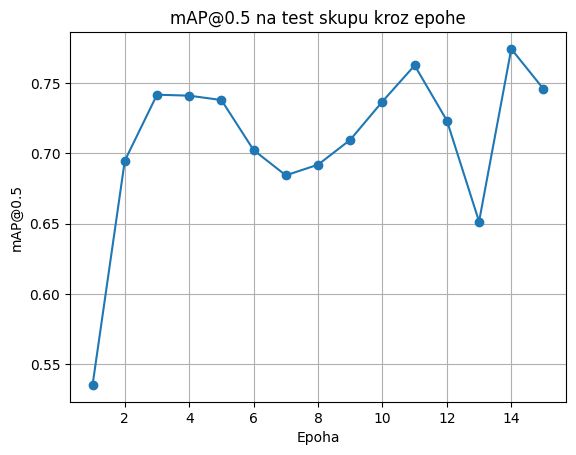

In [8]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import shutil
import os

# Konfiguracija
DATA_YAML_PATH = "yolo_dataset/data.yaml"
BEST_MODEL_PATH = "best_yolov8.pt"
INITIAL_WEIGHTS = "yolov8s.pt"
EPOCHS = 15

# Inicijaliziraj model
model = YOLO(INITIAL_WEIGHTS)
map_scores = []
best_map = 0.0

# Loop po epohama
for epoch in range(EPOCHS):
    print(f"\n Epoha {epoch + 1}/{EPOCHS}")

    # Treniraj samo 1 epohu
    model.train(data=DATA_YAML_PATH, epochs=1, batch=8, imgsz=640, project="runs", name="custom_loop", exist_ok=True)

    # Validacija na test skupu
    metrics = model.val(data=DATA_YAML_PATH, split="test", imgsz=640, batch=8)

    # Dohvati mAP@0.5 i dodaj u listu
    map_50 = metrics.box.map50  # float
    print(f"mAP@0.5 test: {map_50:.4f}")
    map_scores.append(map_50)


# Plotanje rezultata
plt.plot(range(1, EPOCHS + 1), map_scores, marker='o')
plt.title("mAP@0.5 na test skupu kroz epohe")
plt.xlabel("Epoha")
plt.ylabel("mAP@0.5")
plt.grid(True)
plt.show()


In [10]:
!cp -r runs/custom_loop /content/drive/MyDrive/yolov8_base/